In [62]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
%pwd

'c:\\Users\\Portable\\OneDrive\\Desktop\\Automated-Stock-Price-Prediction-Pipeline-A-Complete-MLOps-Lifecycle\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\Portable\\OneDrive\\Desktop\\Automated-Stock-Price-Prediction-Pipeline-A-Complete-MLOps-Lifecycle'

In [5]:
import pandas as pd

In [11]:
data = pd.read_csv(r"data\processed\processed_stock_data.csv")

In [12]:
data

,date,open,high,low,close,volume,close_normalized,SMA_20,EMA_20,close_lag1,close_lag3
0,2024-11-21 19:59:00,222.2800,222.4000,222.2800,222.4000,70,1.907680,211.309072,222.400000,211.327118,211.324528
1,2024-11-21 19:58:00,222.4000,222.4000,222.4000,222.4000,20,1.907680,211.309072,222.400000,222.400000,211.324528
2,2024-11-21 19:55:00,221.8100,221.8100,221.8100,221.8100,3,1.806022,211.309072,222.343810,222.400000,211.324528
3,2024-11-21 19:49:00,221.8101,221.8101,221.8101,221.8101,4,1.806039,211.309072,222.292980,221.810000,222.400000
4,2024-11-21 19:46:00,221.8100,222.3852,221.8100,222.2600,21,1.883558,211.309072,222.289839,221.810100,222.400000
...,...,...,...,...,...,...,...,...,...,...,...
14461,2024-10-23 04:04:00,230.0580,230.1770,230.0282,230.1770,28,3.247675,230.126900,230.064822,230.038100,229.978600
14462,2024-10-23 04:03:00,230.0877,230.0877,230.0877,230.0877,1,3.232288,230.119460,230.067001,230.177000,229.839700
14463,2024-10-23 04:02:00,230.0877,230.0877,230.0877,230.0877,2,3.232288,230.113505,230.068972,230.087700,230.038100
14464,2024-10-23 04:01:00,230.0381,230.0778,230.0183,230.0183,9,3.220330,230.094160,230.064146,230.087700,230.177000


In [16]:
# Create a new dataframe with only the 'Close column 
close_data = data.filter(['close'])
close_data

,close
0,222.4000
1,222.4000
2,221.8100
3,221.8101
4,222.2600
...,...
14461,230.1770
14462,230.0877
14463,230.0877
14464,230.0183


In [17]:
# Convert the dataframe to a numpy array
dataset = close_data.values

In [18]:
dataset

array([[222.4   ],
       [222.4   ],
       [221.81  ],
       ...,
       [230.0877],
       [230.0183],
       [228.2622]])

In [22]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

13743

In [24]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.67159581],
       [0.67159581],
       [0.65223796],
       ...,
       [0.92382852],
       [0.92155151],
       [0.86393404]])

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

In [28]:
len(train_data)

13743

In [50]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [51]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Take 60 consecutive data points
    y_train.append(train_data[i, 0])      # Take the next data point as the target
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.67159581, 0.67159581, 0.65223796, 0.65224124, 0.66700242,
       0.65256606, 0.66536193, 0.66569003, 0.60925699, 0.66831482,
       0.66831482, 0.66831482, 0.6729082 , 0.60925699, 0.67159581,
       0.67126771, 0.66831482, 0.67159581, 0.67258011, 0.67159581,
       0.67159581, 0.67159581, 0.6729082 , 0.67159581, 0.66831482,
       0.6729082 , 0.67258011, 0.65847513, 0.66831482, 0.6729082 ,
       0.65847185, 0.6729082 , 0.6729082 , 0.6729082 , 0.6729082 ,
       0.66831482, 0.6729082 , 0.6729082 , 0.67159581, 0.67159581,
       0.67159581, 0.67061151, 0.67093961, 0.65847185, 0.6729082 ,
       0.66700242, 0.66601812, 0.66569003, 0.66601812, 0.65883275,
       0.67093961, 0.65847185, 0.66995531, 0.66569003, 0.66569003,
       0.65847185, 0.65879994, 0.65847185, 0.65847185, 0.65912804])]
[0.6584718458196903]



In [52]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
x_train.shape

(13683, 60)

LSTM requires the data to be in this format: "(number_of_samples, time_steps, number_of_features)."

The 1 in the last index signifies that there's one feature per time step. 

In [55]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [56]:
x_train.shape

(13683, 60, 1)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

13683/13683 [==============================] - 377s 27ms/step - loss: 2.4889e-04


In [60]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

23/23 [==============================] - 2s 36ms/step


0.6978833321540528

C:\Users\Portable\AppData\Local\Temp\ipykernel_2856\2269485014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


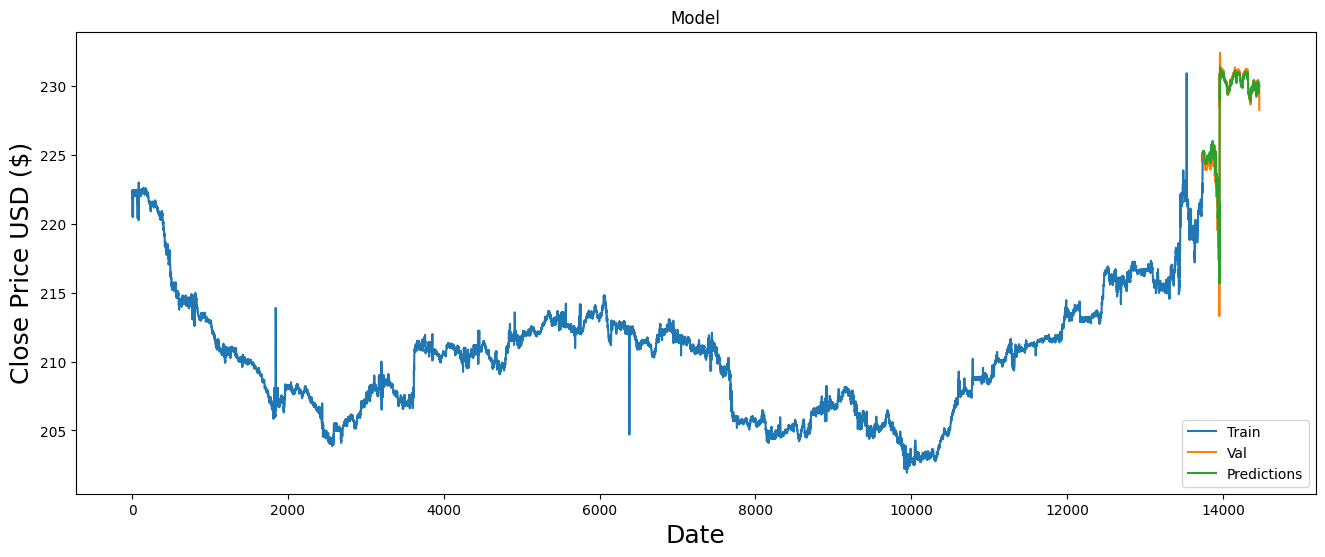

In [65]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [78]:
from pathlib import Path
from dataclasses import dataclass
from src.StockPricePrediction import logger

In [79]:
from src.StockPricePrediction.utils.common import read_yaml, create_directories
from src.StockPricePrediction.constants import *

In [80]:
@dataclass(frozen=True)
class ModelTrainingConfig:
    data_path: Path
    test_size: float
    learning_rate: float
    epochs: int
    batch_size: int
    lstm_units: list
    dense_units: list

In [86]:

class ModelTraining:
    def __init__(self, config: ModelTrainingConfig):
        self.config = config
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = None
        
    def build_model(self):
        try:
            model = Sequential()
            # Add LSTM layers
            for units in self.config.lstm_units:
                model.add(LSTM(units, return_sequences=(units != self.config.lstm_units[-1])))
            # Add dense layers
            for units in self.config.dense_units:
                model.add(Dense(units))
            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')
            self.model = model
            logger.info("Model built successfully.")
            return model
        except Exception as e:
            logger.error(f"Error during model building: {e}")
            raise
        return None

In [87]:
class ConfigurationManager:
    def __init__(self, config_filepath: Path):
        self.config = read_yaml(config_filepath)

    def get_model_training_config(self) -> ModelTrainingConfig:
        config = self.config['model_params']

        model_training_config = ModelTrainingConfig(
            data_path=Path(config['data_path']),
            test_size=config['test_size'],
            learning_rate=config['learning_rate'],
            epochs=config['epochs'],
            batch_size=config['batch_size'],
            lstm_units=config['lstm_units'],
            dense_units=config['dense_units'],
        )

        return model_training_config

In [88]:
config_manager = ConfigurationManager(config_filepath=CONFIG_FILE_PATH)  
model_training_config = config_manager.get_model_training_config()

model_training = ModelTraining(config=model_training_config)
model = model_training.build_model()
model

[2024-11-22 20:14:47,723: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-11-22 20:14:47,757: INFO: 2197671697: Model built successfully.]


In [95]:
config = model.get_config()
config

{'name': 'sequential_3',
 'layers': [{'module': 'keras.layers',
   'class_name': 'LSTM',
   'config': {'name': 'lstm_6',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 128,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'recurrent_initializer': {'module': 'keras.initializers',
     'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regul